
# Importance of Feature Scaling

Feature scaling through standardization, also called Z-score normalization, is
an important preprocessing step for many machine learning algorithms. It
involves rescaling each feature such that it has a standard deviation of 1 and a
mean of 0.

Even if tree based models are (almost) not affected by scaling, many other
algorithms require features to be normalized, often for different reasons: to
ease the convergence (such as a non-penalized logistic regression), to create a
completely different model fit compared to the fit with unscaled data (such as
KNeighbors models). The latter is demoed on the first part of the present
example.

On the second part of the example we show how Principle Component Analysis (PCA)
is impacted by normalization of features. To illustrate this, we compare the
principal components found using :class:`~sklearn.decomposition.PCA` on unscaled
data with those obatined when using a
:class:`~sklearn.preprocessing.StandardScaler` to scale data first.

In the last part of the example we show the effect of the normalization on the
accuracy of a model trained on PCA-reduced data.



# Важность масштабирования функций

Масштабирование признаков посредством стандартизации, также называемое 
нормализацией Z-показателя, является важным шагом предварительной обработки 
для многих алгоритмов машинного обучения. Он включает в себя изменение 
масштаба каждого признака таким образом, чтобы его стандартное отклонение 
было равно 1, а среднее значение — 0.

Даже если на древовидные модели (почти) не влияет масштабирование, 
многие другие алгоритмы требуют нормализации функций, часто по разным причинам: 
для облегчения сходимости (например, нештрафованная логистическая регрессия), 
для создания совершенно другой модели, подходящей для модели. 
По сравнению с подгонкой немасштабированных данных (таких как модели KNeighbours). 
Последнее демонстрируется в первой части настоящего примера.

Во второй части примера мы показываем, как нормализация функций влияет на 
анализ основных компонентов (PCA). Чтобы проиллюстрировать это, мы сравниваем 
основные компоненты, найденные при использовании PCA немасштабированных данных, 
с теми, которые были получены при StandardScaler первом использовании для масштабирования данных.

В последней части примера мы показываем влияние нормализации на точность 
модели, обученной на данных, уменьшенных с помощью PCA.

In [8]:
# Author: Tyler Lanigan <tylerlanigan@gmail.com>
#         Sebastian Raschka <mail@sebastianraschka.com>
#         Arturo Amor <david-arturo.amor-quiroz@inria.fr>
# License: BSD 3 clause

## Load and prepare data

The dataset used is the `wine_dataset` available at UCI. This dataset has
continuous features that are heterogeneous in scale due to differing
properties that they measure (e.g. alcohol content and malic acid).




## Загрузка и подготовка данных 

Используемый набор данных — это набор данных распознавания Wine, доступный в UCI. 
Этот набор данных имеет непрерывные характеристики, 
неоднородные по масштабу из-за разных измеряемых ими свойств 
(например, содержания алкоголя и яблочной кислоты).

In [9]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = load_wine(return_X_y=True, as_frame=True)
scaler = StandardScaler().set_output(transform="pandas")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)
scaled_X_train = scaler.fit_transform(X_train)


## Effect of rescaling on a k-neighbors models

For the sake of visualizing the decision boundary of a
:class:`~sklearn.neighbors.KNeighborsClassifier`, in this section we select a
subset of 2 features that have values with different orders of magnitude.

Keep in mind that using a subset of the features to train the model may likely
leave out feature with high predictive impact, resulting in a decision
boundary that is much worse in comparison to a model trained on the full set
of features.




## Влияние масштабирования на модели k-соседей 

Чтобы визуализировать границу решения a KNeighborsClassifier, 
в этом разделе мы выбираем подмножество из двух функций, которые 
имеют значения разных порядков величины.

Имейте в виду, что использование подмножества функций для обучения модели, 
скорее всего, может привести к исключению функции с высоким прогнозирующим 
воздействием, что приведет к тому, что граница принятия решения будет намного 
хуже по сравнению с моделью, обученной на полном наборе функций.

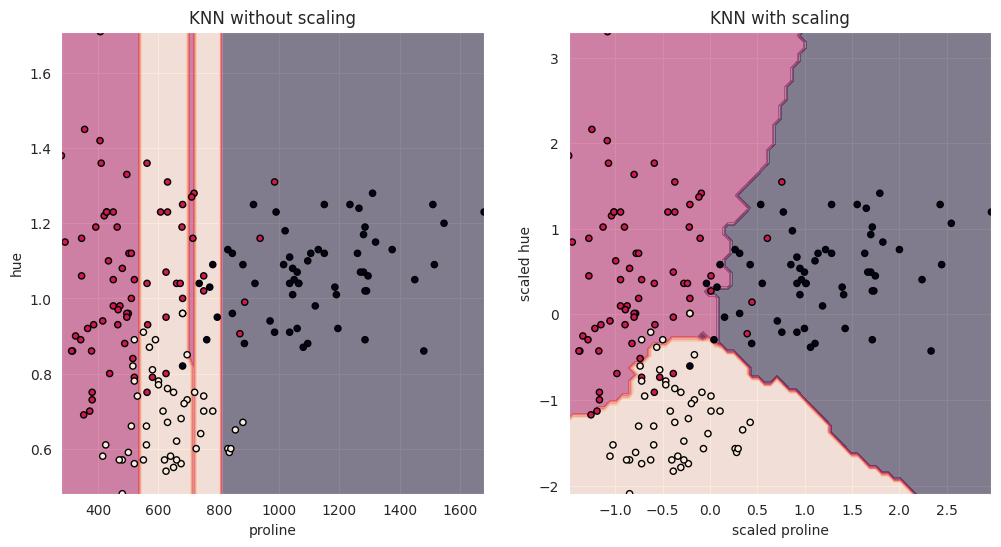

In [10]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

X_plot = X[["proline", "hue"]]
X_plot_scaled = scaler.fit_transform(X_plot)
clf = KNeighborsClassifier(n_neighbors=20)


def fit_and_plot_model(X_plot, y, clf, ax):
    clf.fit(X_plot, y)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_plot,
        response_method="predict",
        alpha=0.5,
        ax=ax,
    )
    disp.ax_.scatter(X_plot["proline"], X_plot["hue"], c=y, s=20, edgecolor="k")
    disp.ax_.set_xlim((X_plot["proline"].min(), X_plot["proline"].max()))
    disp.ax_.set_ylim((X_plot["hue"].min(), X_plot["hue"].max()))
    return disp.ax_


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

fit_and_plot_model(X_plot, y, clf, ax1)
ax1.set_title("KNN without scaling")

fit_and_plot_model(X_plot_scaled, y, clf, ax2)
ax2.set_xlabel("scaled proline")
ax2.set_ylabel("scaled hue")
_ = ax2.set_title("KNN with scaling")

Here the decision boundary shows that fitting scaled or non-scaled data lead
to completely different models. The reason is that the variable "proline" has
values which vary between 0 and 1,000; whereas the variable "hue" varies
between 1 and 10. Because of this, distances between samples are mostly
impacted by differences in values of "proline", while values of the "hue" will
be comparatively ignored. If one uses
:class:`~sklearn.preprocessing.StandardScaler` to normalize this database,
both scaled values lay approximately between -3 and 3 and the neighbors
structure will be impacted more or less equivalently by both variables.

Здесь граница решения показывает, что подгонка масштабированных или 
немасштабированных данных приводит к совершенно разным моделям. 
Причина в том, что переменная «пролин» имеет значения от 0 до 1000; 
тогда как переменная «оттенок» варьируется от 1 до 10. 
Из-за этого на расстояния между образцами больше всего влияют 
различия в значениях «пролина», тогда как значения «оттенка» 
будут сравнительно игнорироваться. Если использовать StandardScaler 
для нормализации этой базы данных, оба масштабированных значения лежат 
примерно между -3 и 3, и обе переменные будут более или менее одинаково 
влиять на структуру соседей.




## Effect of rescaling on a PCA dimensional reduction

Dimensional reduction using :class:`~sklearn.decomposition.PCA` consists of
finding the features that maximize the variance. If one feature varies more
than the others only because of their respective scales,
:class:`~sklearn.decomposition.PCA` would determine that such feature
dominates the direction of the principal components.

We can inspect the first principal components using all the original features:




## Влияние изменения масштаба на уменьшение размеров PCA

Использование размерного сокращения PCA состоит в поиске признаков, 
которые максимизируют дисперсию. Если один признак изменяется больше, 
чем другие, только из-за их соответствующих масштабов, PCA можно 
определить, что такой признак доминирует над направлением главных компонентов.

Мы можем проверить первые главные компоненты, используя все исходные функции:

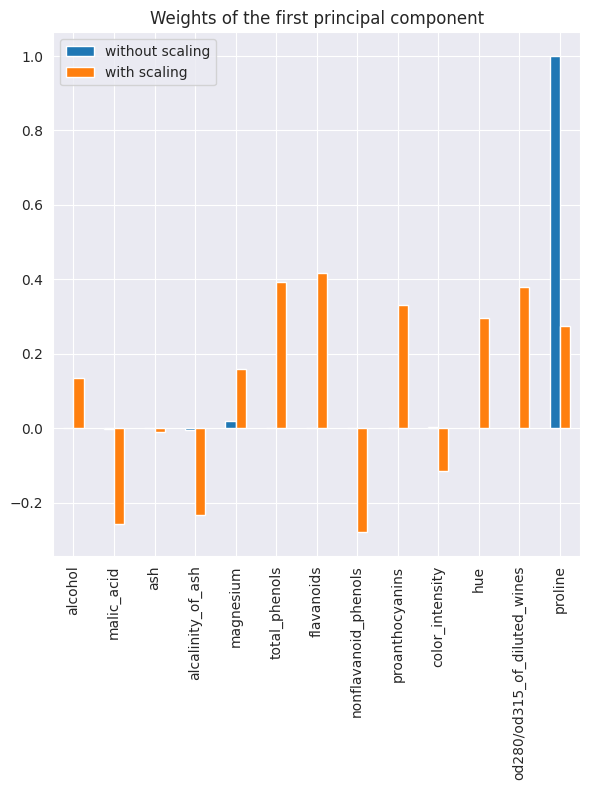

In [11]:
import pandas as pd

from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X_train)
scaled_pca = PCA(n_components=2).fit(scaled_X_train)
X_train_transformed = pca.transform(X_train)
X_train_std_transformed = scaled_pca.transform(scaled_X_train)

first_pca_component = pd.DataFrame(
    pca.components_[0], index=X.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = scaled_pca.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 8)
)

_ = plt.tight_layout()

Indeed we find that the "proline" feature dominates the direction of the first
principal component without scaling, being about two orders of magnitude above
the other features. This is contrasted when observing the first principal
component for the scaled version of the data, where the orders of magnitude
are roughly the same across all the features.

We can visualize the distribution of the principal components in both cases:



Действительно, мы обнаружили, что особенность «пролин» доминирует над 
направлением первого главного компонента без масштабирования, будучи 
примерно на два порядка выше других особенностей. Это контрастирует с 
наблюдением первого главного компонента для масштабированной версии данных, 
где порядки величин примерно одинаковы для всех функций.

Мы можем визуализировать распределение главных компонентов в обоих случаях:


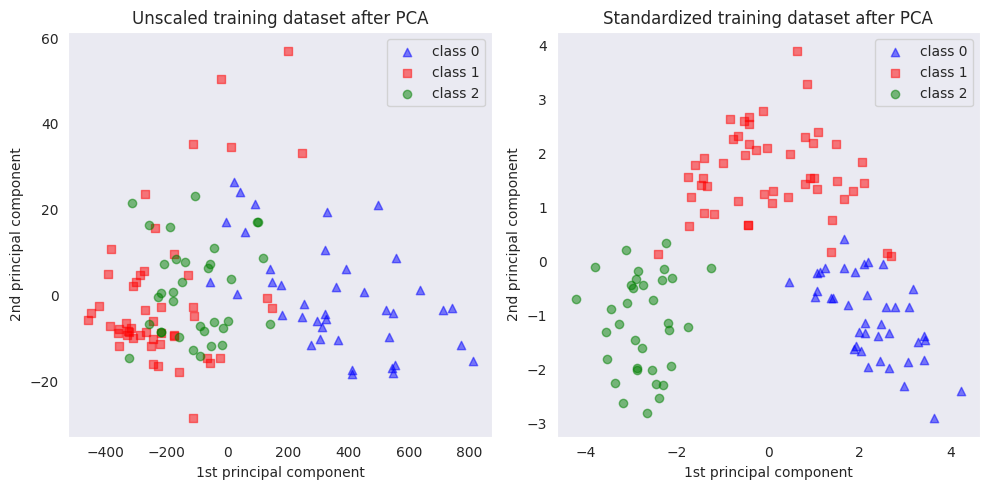

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Unscaled training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

_ = plt.tight_layout()

From the plot above we observe that scaling the features before reducing the
dimensionality results in components with the same order of magnitude. In this
case it also improves the separability of the classes. Indeed, in the next
section we confirm that a better separability has a good repercussion on the
overall model's performance.

Из приведенного выше графика мы видим, что масштабирование признаков перед 
уменьшением размерности приводит к получению компонентов одного и того же порядка. 
В этом случае это также улучшает разделимость классов. Действительно, в следующем 
разделе мы подтверждаем, что лучшая разделимость оказывает хорошее влияние 
на общую производительность модели.



## Effect of rescaling on model's performance

First we show how the optimal regularization of a
:class:`~sklearn.linear_model.LogisticRegressionCV` depends on the scaling or
non-scaling of the data:




## Влияние масштабирования на производительность модели 

Сначала мы покажем, как оптимальная регуляризация a LogisticRegressionCV
зависит от масштабирования или немасштабирования данных:


In [13]:
import numpy as np

from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline

Cs = np.logspace(-5, 5, 20)

unscaled_clf = make_pipeline(pca, LogisticRegressionCV(Cs=Cs))
unscaled_clf.fit(X_train, y_train)

scaled_clf = make_pipeline(scaler, pca, LogisticRegressionCV(Cs=Cs))
scaled_clf.fit(X_train, y_train)

print(f"Optimal C for the unscaled PCA: {unscaled_clf[-1].C_[0]:.4f}\n")
print(f"Optimal C for the standardized data with PCA: {scaled_clf[-1].C_[0]:.2f}")

Optimal C for the unscaled PCA: 0.0004

Optimal C for the standardized data with PCA: 20.69


The need for regularization is higher (lower values of `C`) for the data that
was not scaled before applying PCA. We now evaluate the effect of scaling on
the accuracy and the mean log-loss of the optimal models:


Потребность в регуляризации выше (меньшие значения C) для данных, которые 
не масштабировались перед применением PCA. Теперь мы оценим влияние 
масштабирования на точность и средние логарифмические потери оптимальных моделей:


In [14]:
from sklearn.metrics import accuracy_score, log_loss

y_pred = unscaled_clf.predict(X_test)
y_pred_scaled = scaled_clf.predict(X_test)
y_proba = unscaled_clf.predict_proba(X_test)
y_proba_scaled = scaled_clf.predict_proba(X_test)

print("Test accuracy for the unscaled PCA")
print(f"{accuracy_score(y_test, y_pred):.2%}\n")
print("Test accuracy for the standardized data with PCA")
print(f"{accuracy_score(y_test, y_pred_scaled):.2%}\n")
print("Log-loss for the unscaled PCA")
print(f"{log_loss(y_test, y_proba):.3}\n")
print("Log-loss for the standardized data with PCA")
print(f"{log_loss(y_test, y_proba_scaled):.3}")

Test accuracy for the unscaled PCA
35.19%

Test accuracy for the standardized data with PCA
96.30%

Log-loss for the unscaled PCA
2.07

Log-loss for the standardized data with PCA
0.0824


A clear difference in prediction accuracies is observed when the data is
scaled before :class:`~sklearn.decomposition.PCA`, as it vastly outperforms
the unscaled version. This corresponds to the intuition obtained from the plot
in the previous section, where the components become linearly separable when
scaling before using :class:`~sklearn.decomposition.PCA`.

Notice that in this case the models with scaled features perform better than
the models with non-scaled features because all the variables are expected to
be predictive and we rather avoid some of them being comparatively ignored.

If the variables in lower scales were not predictive, one may experience a
decrease of the performance after scaling the features: noisy features would
contribute more to the prediction after scaling and therefore scaling would
increase overfitting.

Last but not least, we observe that one achieves a lower log-loss by means of
the scaling step.



Явная разница в точности прогнозов наблюдается, когда данные масштабируются до PCA, 
поскольку они значительно превосходят немасштабированную версию. 
Это соответствует интуиции, полученной из графика в предыдущем разделе, 
где компоненты становятся линейно разделимыми при масштабировании перед использованием PCA.

Обратите внимание, что в этом случае модели с масштабированными характеристиками 
работают лучше, чем модели с немасштабированными характеристиками, поскольку ожидается, 
что все переменные будут прогнозирующими, и мы предпочитаем избегать сравнительного 
игнорирования некоторых из них.

Если бы переменные в более низких масштабах не были прогнозирующими, можно было бы 
столкнуться со снижением производительности после масштабирования признаков: 
зашумленные признаки будут вносить больший вклад в прогноз после масштабирования, 
и, следовательно, масштабирование увеличит переобучение.

И последнее, но не менее важное: мы наблюдаем, что за счет шага масштабирования 
достигаются меньшие логарифмические потери.